# Borrador para el dashboard 

In [5]:
# Importamos librerias necesarias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#from .src.dash import *


In [1]:
DATA_CLEAN_DIRECTORY = "../data/clean/"

VENTAS_FILE = "data_agg_ventas.csv"
CLIENTES_FILE = "data_agg_clientes.csv"
TOP_FILE = "data_top_productos.csv"
CLEAN_FILE = "data_clean.csv"

In [6]:
# Configuraciones 

plt.style.use("ggplot")

In [7]:
### Importamos los datos 

df_ventas = pd.read_csv( DATA_CLEAN_DIRECTORY + VENTAS_FILE)
df_clientes = pd.read_csv( DATA_CLEAN_DIRECTORY + CLIENTES_FILE)
df_top = pd.read_csv( DATA_CLEAN_DIRECTORY + TOP_FILE)
df = pd.read_csv(DATA_CLEAN_DIRECTORY + CLEAN_FILE)

In [8]:
df["ventas_m"] = df["ventas"]/1000

In [9]:
df.head(3)

,fecha,region,producto,ventas,clientes,anio,mes,dia,anio_mes,ventas_m
0,2023-01-01,norte,producto_a,210821,1689,2023,1,1,2023-01,210.821
1,2023-01-01,norte,producto_b,531578,1269,2023,1,1,2023-01,531.578
2,2023-01-01,norte,producto_c,158817,1678,2023,1,1,2023-01,158.817


In [9]:
auxiliar_pivot_df = (df.pivot_table(index = "fecha",
                    values = ["ventas", "clientes"],
                    aggfunc = np.sum).reset_index().rename(
                        columns = {"index":"fecha"}
                    ))

/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_25487/1293497473.py:1: FutureWarning: The provided callable <function sum at 0x116976050> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  auxiliar_pivot_df = (df.pivot_table(index = "fecha",


/Users/edgardaniel/Desktop/arquitectura_datos/spark/gsalinas_caso/src/dash.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


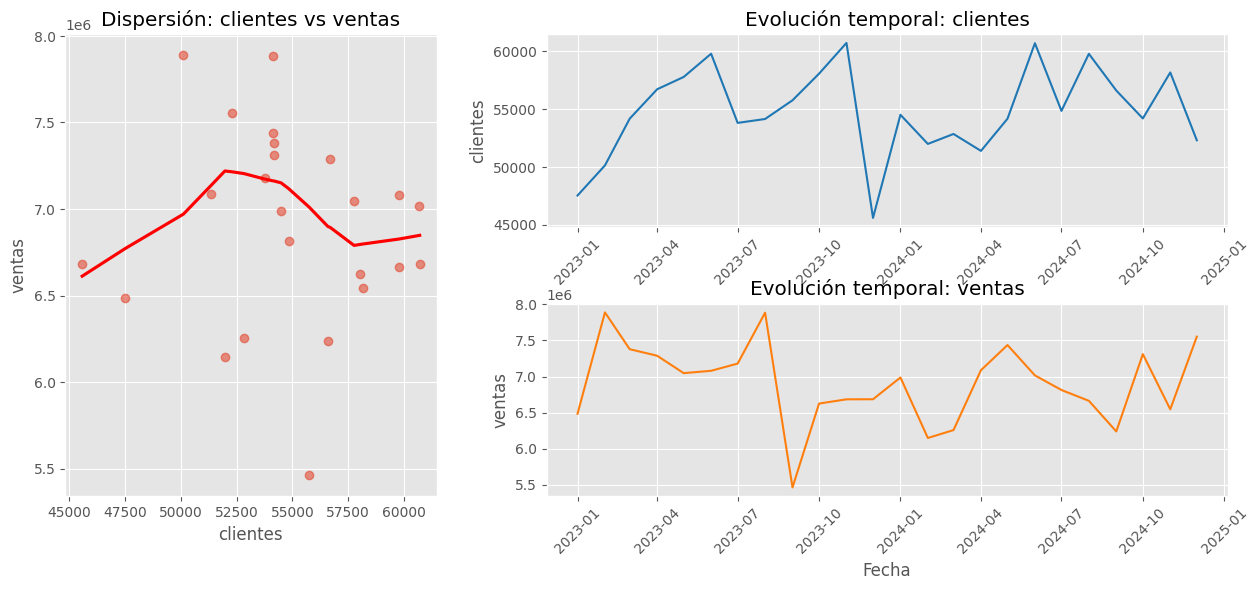

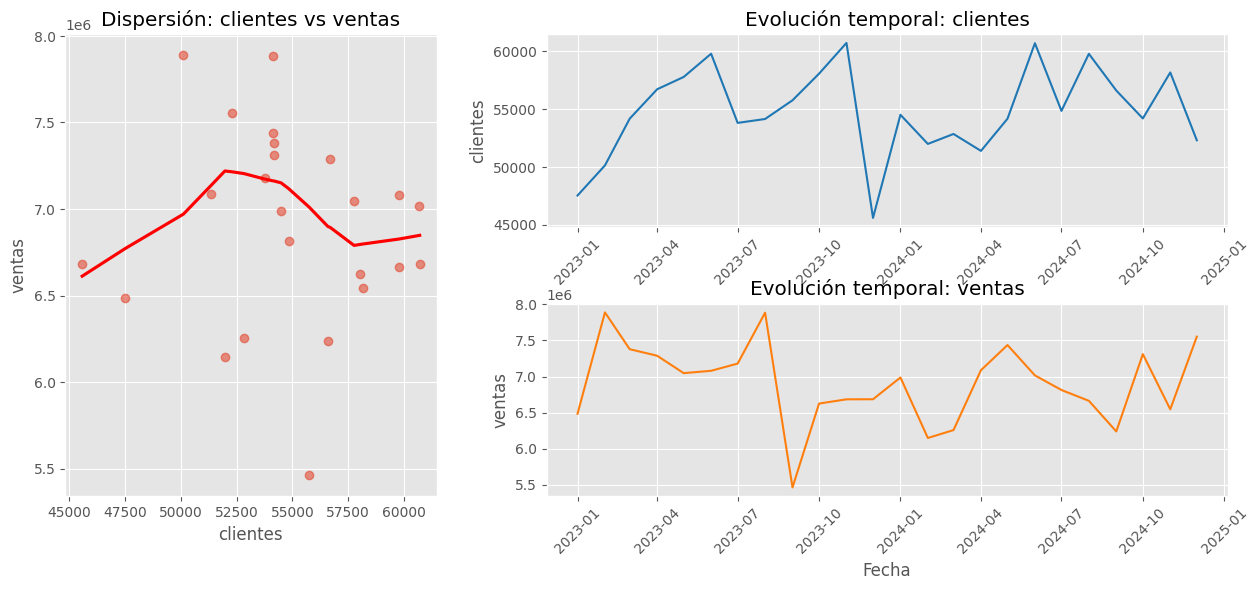

In [8]:
generar_figura_comparativa(auxiliar_pivot_df
                     , "fecha", "clientes", "ventas")

<Axes: xlabel='producto', ylabel='ventas'>

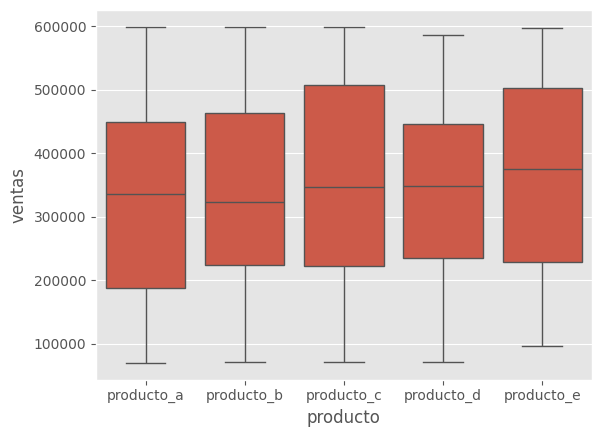

In [14]:
sns.boxplot(data=df, x="producto", y="ventas")



/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_5702/3785657857.py:1: FutureWarning: The provided callable <function sum at 0x10aa76050> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(index = "fecha",


<Axes: xlabel='fecha'>

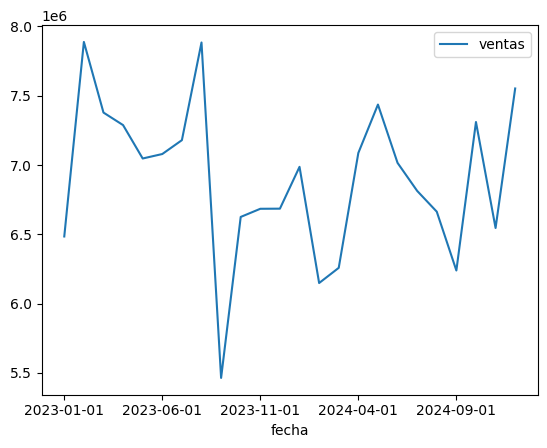

In [14]:
df.pivot_table(index = "fecha", 
               values = "ventas", aggfunc = np.sum).plot()

In [22]:
(df_ventas.pivot_table(index = "region", values = "ventas_totales", 
                      aggfunc= np.sum, columns = "producto")/1e6).round(4)

/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_25487/2968822402.py:1: FutureWarning: The provided callable <function sum at 0x116976050> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  (df_ventas.pivot_table(index = "region", values = "ventas_totales",


producto,producto_a,producto_b,producto_c,producto_d,producto_e
region,,,,,
este,3.8960,4.0181,3.8129,4.3671,4.4689
norte,4.6140,5.7897,4.8854,4.1594,3.9364
oeste,3.3388,3.6974,4.6042,4.2556,3.5738
sur,3.9054,3.7382,3.7260,3.2258,4.0406


In [33]:
df["ventas_p_cliente"] = df["ventas"]/df["clientes"]

<Axes: >

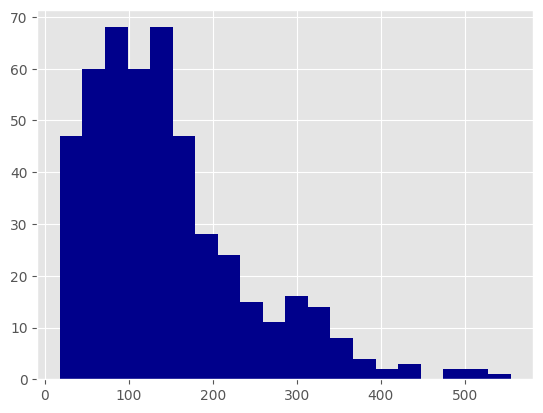

In [65]:
df["ventas_p_cliente"].hist(bins = 20, color = "darkblue")
#df["ventas_p_cliente"].hist(cumulative=True, density = True, fill = None)

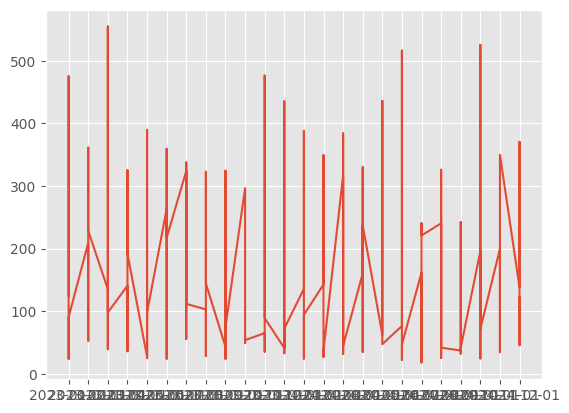

In [35]:
plt.plot(df.fecha, df.ventas_p_cliente)

/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_25487/1927163809.py:1: FutureWarning: The provided callable <function mean at 0x116977250> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index = "fecha", columns = "region",


<Axes: xlabel='fecha'>

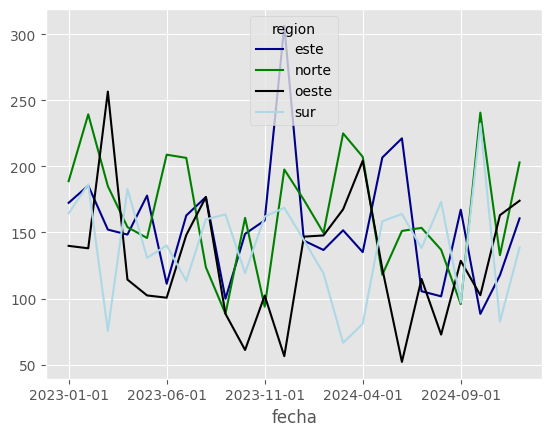

In [48]:
df.pivot_table(index = "fecha", columns = "region", 
               values = "ventas_p_cliente", aggfunc = np.mean).plot(
                   color = ["darkblue", "green", "black", "lightblue"])

In [67]:
df_clientes

,region,producto,clientes_totales,clientes_cuota
0,sur,producto_b,36794,0.055639
1,norte,producto_c,32756,0.049533
2,este,producto_a,33619,0.050838
3,sur,producto_c,34161,0.051657
4,este,producto_e,34657,0.052407
5,sur,producto_e,26693,0.040364
6,oeste,producto_a,28369,0.042899
7,oeste,producto_e,37701,0.057010
8,norte,producto_e,30150,0.045592
9,norte,producto_a,32668,0.049400


In [70]:
df_clientes.pivot_table(index = "region", columns = "producto", 
                        values = "clientes_cuota", aggfunc = np.sum)*100

/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_25487/2814842779.py:1: FutureWarning: The provided callable <function sum at 0x116976050> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_clientes.pivot_table(index = "region", columns = "producto",


producto,producto_a,producto_b,producto_c,producto_d,producto_e
region,,,,,
este,5.0838,5.2634,4.4505,4.9881,5.2407
norte,4.9400,4.7272,4.9533,4.7221,4.5592
oeste,4.2899,5.6800,4.8355,5.3868,5.7010
sur,5.4541,5.5639,5.1657,4.9584,4.0364


In [74]:
cluster_df = (pd.read_csv(DATA_CLEAN_DIRECTORY + "clusters.csv")
              .filter(["anio_mes", "region", "producto", "cluster"])
              )

In [75]:
cluster_df

,anio_mes,region,producto,cluster
0,2023-01,norte,producto_a,2
1,2023-01,norte,producto_b,3
2,2023-01,norte,producto_c,2
3,2023-01,norte,producto_d,1
4,2023-01,norte,producto_e,3
...,...,...,...,...
475,2024-12,oeste,producto_a,2
476,2024-12,oeste,producto_b,3
477,2024-12,oeste,producto_c,1
478,2024-12,oeste,producto_d,1


In [12]:
df.pivot_table(index = "fecha", columns = "producto", 
               aggfunc = np.sum, values = "ventas").corr()

/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_76470/447463969.py:1: FutureWarning: The provided callable <function sum at 0x10667dfc0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(index = "fecha", columns = "producto",


producto,producto_a,producto_b,producto_c,producto_d,producto_e
producto,,,,,
producto_a,1.000000,-0.375081,-0.029304,-0.021492,-0.052202
producto_b,-0.375081,1.000000,0.003628,-0.067078,0.021342
producto_c,-0.029304,0.003628,1.000000,0.110572,-0.160579
producto_d,-0.021492,-0.067078,0.110572,1.000000,0.105829
producto_e,-0.052202,0.021342,-0.160579,0.105829,1.000000


/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_76470/694486525.py:1: FutureWarning: The provided callable <function sum at 0x10667dfc0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sns.heatmap(df.pivot_table(index = "fecha", columns = "producto",


<Axes: xlabel='producto', ylabel='producto'>

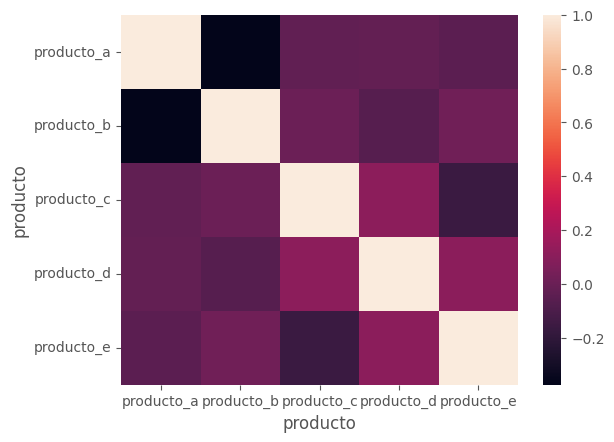

In [13]:
sns.heatmap(df.pivot_table(index = "fecha", columns = "producto", 
               aggfunc = np.sum, values = "ventas").corr())